# Student Performance Prediction with Multiple Linear Regression

This notebook explores factors affecting student academic performance using a synthetic dataset of 10,000 students. We'll use multiple linear regression to predict a **Performance Index** (10–100) based on study hours, sleep, previous scores, extracurricular activities, and practice questions.

## Table of Contents
1. Data Loading & Overview
2. Exploratory Data Analysis
3. Data Preprocessing
4. Model Training & Evaluation
5. Results & Insights


## 1. Data Loading & Overview


In [176]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")


In [177]:
# Load the dataset
# For local environment - download from Kaggle using kagglehub
import kagglehub
import os

# Download the dataset
dataset_path = kagglehub.dataset_download("nikhil7280/student-performance-multiple-linear-regression")
csv_file_path = os.path.join(dataset_path, "Student_Performance.csv")
df = pd.read_csv(csv_file_path)

# Alternative: For Kaggle environment, use this line instead:
# df = pd.read_csv('/kaggle/input/student-performance-multiple-linear-regression/Student_Performance.csv')

print("Dataset Overview:")
print(f"Shape: {df.shape}")
print(f"\nColumns: {list(df.columns)}")
print("\nFirst 5 rows:")
df.head()


Dataset Overview:
Shape: (10000, 6)

Columns: ['Hours Studied', 'Previous Scores', 'Extracurricular Activities', 'Sleep Hours', 'Sample Question Papers Practiced', 'Performance Index']

First 5 rows:


,Hours Studied,Previous Scores,Extracurricular Activities,Sleep Hours,Sample Question Papers Practiced,Performance Index
0,7,99,Yes,9,1,91.0
1,4,82,No,4,2,65.0
2,8,51,Yes,7,2,45.0
3,5,52,Yes,5,2,36.0
4,7,75,No,8,5,66.0


In [178]:
# Basic dataset information
print("Dataset Information:")
print(f"\nData Types:")
print(df.dtypes)
print(f"\nMissing Values:")
print(df.isnull().sum())
print(f"\nSummary Statistics:")
df.describe()


Dataset Information:

Data Types:
Hours Studied                         int64
Previous Scores                       int64
Extracurricular Activities           object
Sleep Hours                           int64
Sample Question Papers Practiced      int64
Performance Index                   float64
dtype: object

Missing Values:
Hours Studied                       0
Previous Scores                     0
Extracurricular Activities          0
Sleep Hours                         0
Sample Question Papers Practiced    0
Performance Index                   0
dtype: int64

Summary Statistics:


,Hours Studied,Previous Scores,Sleep Hours,Sample Question Papers Practiced,Performance Index
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,4.992900,69.445700,6.530600,4.583300,55.224800
std,2.589309,17.343152,1.695863,2.867348,19.212558
min,1.000000,40.000000,4.000000,0.000000,10.000000
25%,3.000000,54.000000,5.000000,2.000000,40.000000
50%,5.000000,69.000000,7.000000,5.000000,55.000000
75%,7.000000,85.000000,8.000000,7.000000,71.000000
max,9.000000,99.000000,9.000000,9.000000,100.000000


## 2. Exploratory Data Analysis


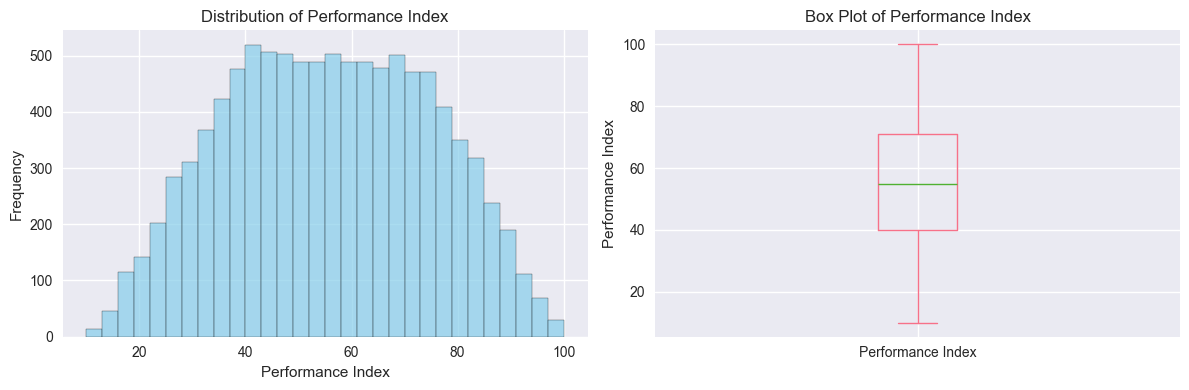

Performance Index Statistics:
Mean: 55.22
Median: 55.00
Std: 19.21


In [179]:
# Distribution of target variable
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['Performance Index'], bins=30, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('Distribution of Performance Index')
plt.xlabel('Performance Index')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
df['Performance Index'].plot(kind='box')
plt.title('Box Plot of Performance Index')
plt.ylabel('Performance Index')

plt.tight_layout()
plt.show()

print(f"Performance Index Statistics:")
print(f"Mean: {df['Performance Index'].mean():.2f}")
print(f"Median: {df['Performance Index'].median():.2f}")
print(f"Std: {df['Performance Index'].std():.2f}")


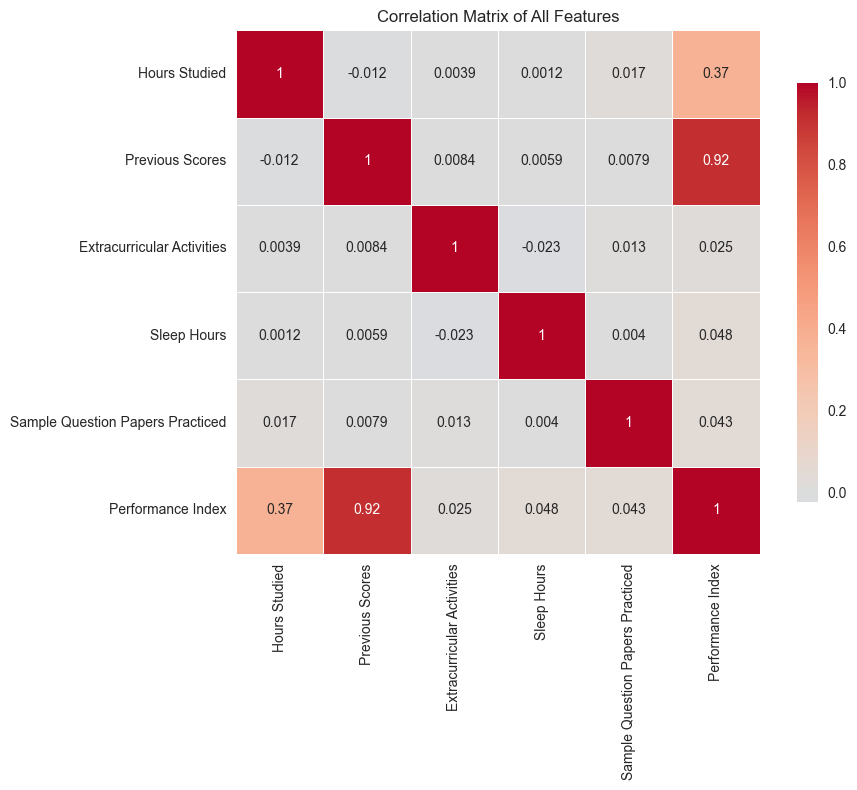

In [180]:
# Correlation heatmap
plt.figure(figsize=(10, 8))

# Create correlation matrix (convert categorical to numeric for correlation)
df_numeric = df.copy()
df_numeric['Extracurricular Activities'] = df_numeric['Extracurricular Activities'].map({'Yes': 1, 'No': 0})

correlation_matrix = df_numeric.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of All Features')
plt.tight_layout()
plt.show()


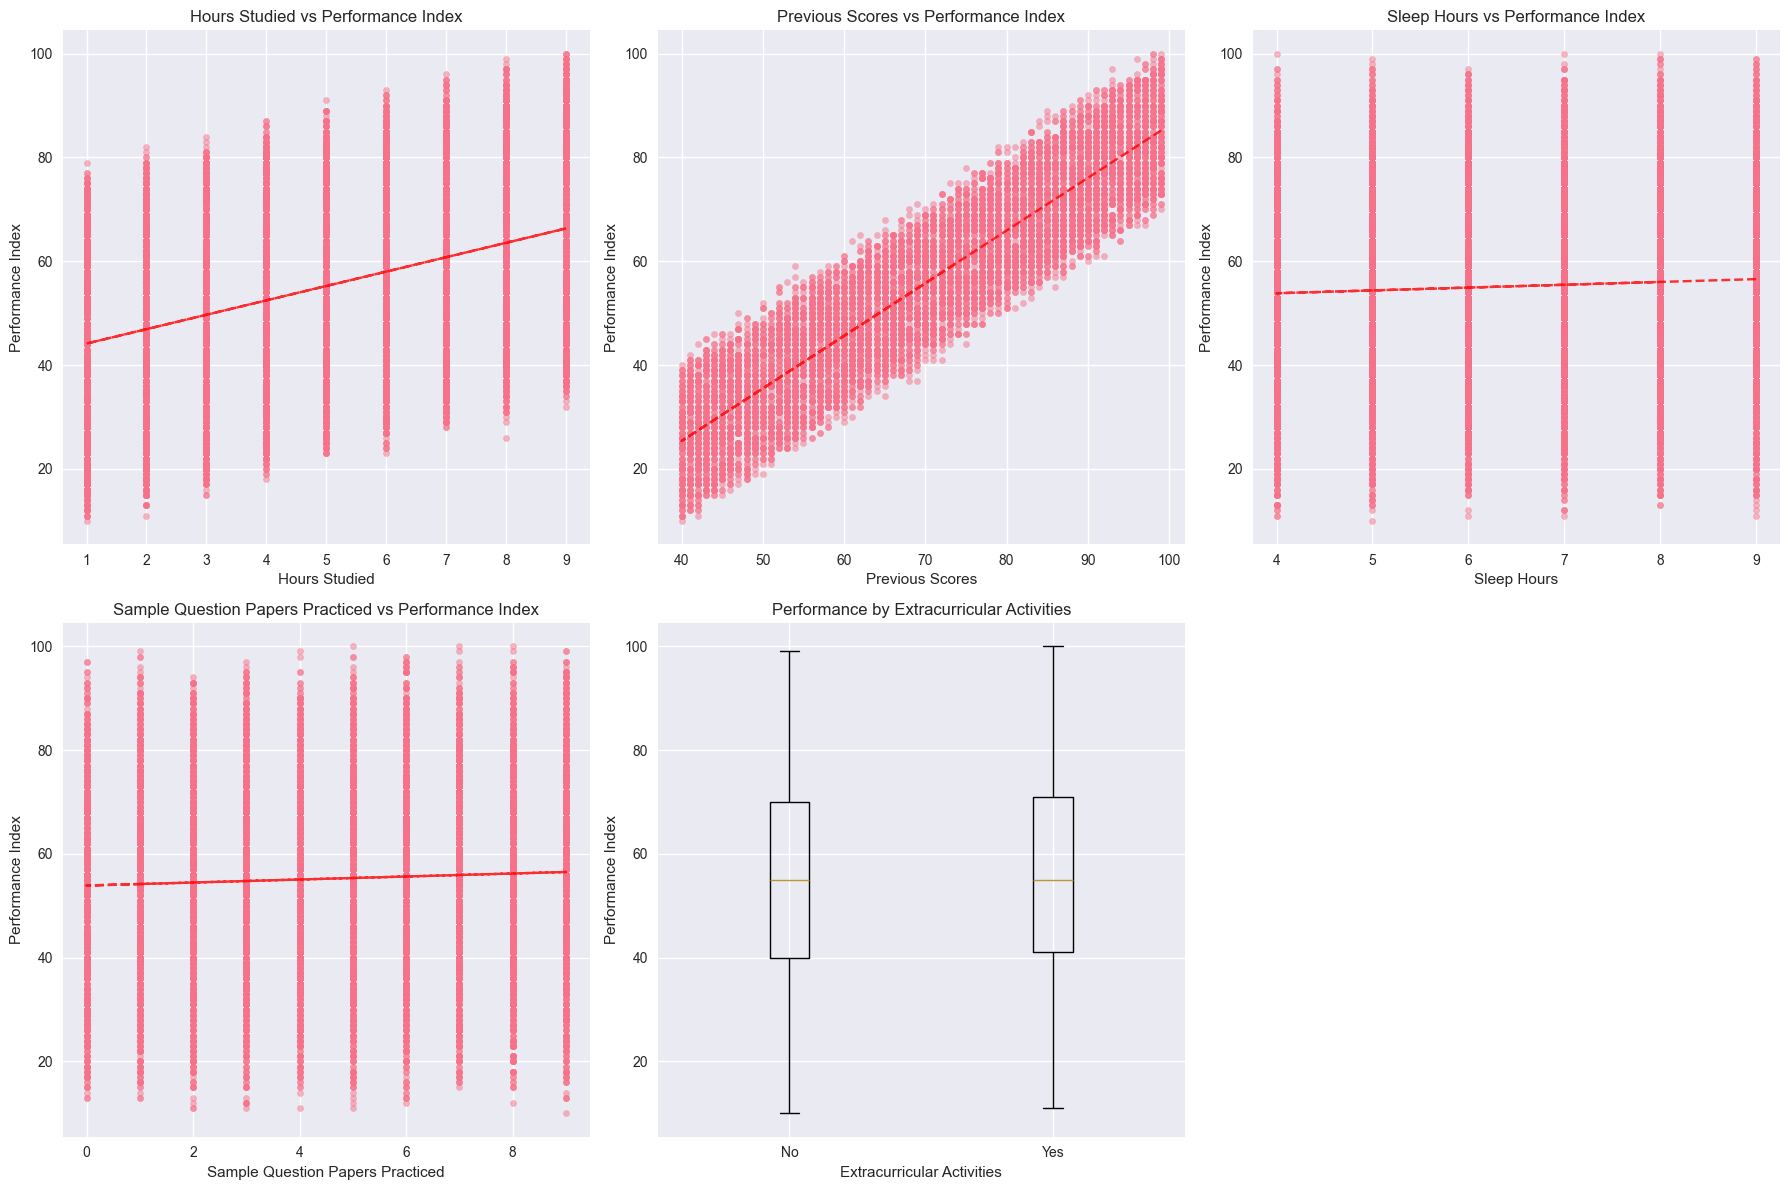

In [181]:
# Feature distributions and relationships with target
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

features = ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced']

for i, feature in enumerate(features):
    # Scatter plot
    axes[i].scatter(df[feature], df['Performance Index'], alpha=0.5, s=20)
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel('Performance Index')
    axes[i].set_title(f'{feature} vs Performance Index')
    
    # Add trend line
    z = np.polyfit(df[feature], df['Performance Index'], 1)
    p = np.poly1d(z)
    axes[i].plot(df[feature], p(df[feature]), "r--", alpha=0.8)

# Extracurricular activities comparison
extracurricular_yes = df[df['Extracurricular Activities'] == 'Yes']['Performance Index']
extracurricular_no = df[df['Extracurricular Activities'] == 'No']['Performance Index']

axes[4].boxplot([extracurricular_no, extracurricular_yes], labels=['No', 'Yes'])
axes[4].set_xlabel('Extracurricular Activities')
axes[4].set_ylabel('Performance Index')
axes[4].set_title('Performance by Extracurricular Activities')

# Remove empty subplot
axes[5].remove()

plt.tight_layout()
plt.show()


In [182]:
# Key insights from EDA
print("Key Insights from EDA:")
print("\n1. Extracurricular Activities Impact:")
extracurricular_impact = df.groupby('Extracurricular Activities')['Performance Index'].agg(['mean', 'count'])
print(extracurricular_impact)

print("\n2. Top Correlations with Performance Index:")
performance_corr = df_numeric.corr()['Performance Index'].sort_values(ascending=False)
print(performance_corr[1:])  # Exclude self-correlation


Key Insights from EDA:

1. Extracurricular Activities Impact:
                                 mean  count
Extracurricular Activities                  
No                          54.758511   5052
Yes                         55.700889   4948

2. Top Correlations with Performance Index:
Previous Scores                     0.915189
Hours Studied                       0.373730
Sleep Hours                         0.048106
Sample Question Papers Practiced    0.043268
Extracurricular Activities          0.024525
Name: Performance Index, dtype: float64


## 3. Data Preprocessing 


In [183]:
# Prepare features and target
X = df.drop('Performance Index', axis=1)
y = df['Performance Index']

# Handle categorical variable
X_encoded = pd.get_dummies(X, columns=['Extracurricular Activities'], drop_first=True)

print("Features after preprocessing:")
print(f"Feature names: {list(X_encoded.columns)}")
print(f"Feature matrix shape: {X_encoded.shape}")
print(f"Target shape: {y.shape}")

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"\nTrain/Test Split:")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")
print(f"Features scaled using StandardScaler")


Features after preprocessing:
Feature names: ['Hours Studied', 'Previous Scores', 'Sleep Hours', 'Sample Question Papers Practiced', 'Extracurricular Activities_Yes']
Feature matrix shape: (10000, 5)
Target shape: (10000,)

Train/Test Split:
Training set: 8000 samples
Test set: 2000 samples
Features scaled using StandardScaler


## 4. Model Training & Evaluation


In [184]:
# Train the model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

# Make predictions
y_train_pred = model.predict(X_train_scaled)
y_test_pred = model.predict(X_test_scaled)

print("Model Training Complete!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.2f}")


Model Training Complete!
Model coefficients: [ 7.40134079 17.63727127  0.81003107  0.54884171  0.30429076]
Model intercept: 55.31


In [185]:
# Model evaluation
def evaluate_model(y_true, y_pred, dataset_name):
    r2 = r2_score(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    
    print(f"\n{dataset_name} Performance:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    
    return r2, rmse, mae

# Evaluate on both train and test sets
train_r2, train_rmse, train_mae = evaluate_model(y_train, y_train_pred, "Training")
test_r2, test_rmse, test_mae = evaluate_model(y_test, y_test_pred, "Test")



Training Performance:
R² Score: 0.9887
RMSE: 2.0420
MAE: 1.6193

Test Performance:
R² Score: 0.9890
RMSE: 2.0206
MAE: 1.6111


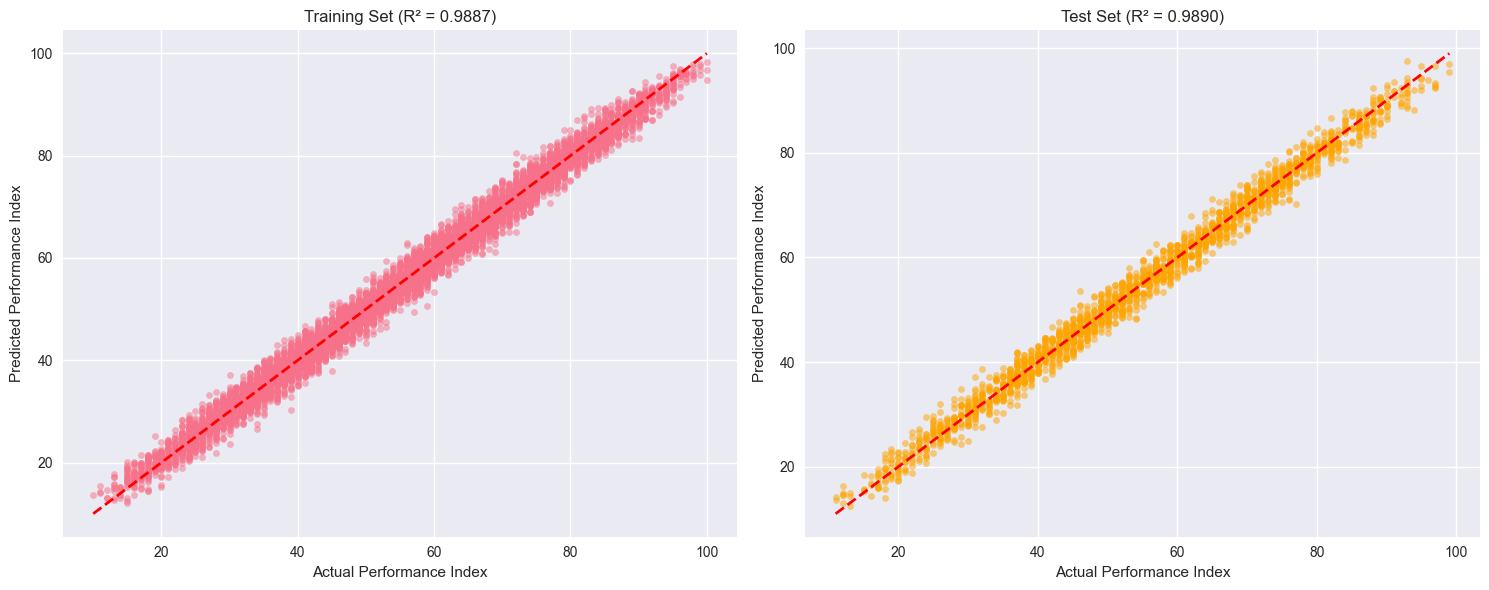

In [186]:
# Visualize predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set
axes[0].scatter(y_train, y_train_pred, alpha=0.5, s=20)
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--', lw=2)
axes[0].set_xlabel('Actual Performance Index')
axes[0].set_ylabel('Predicted Performance Index')
axes[0].set_title(f'Training Set (R² = {train_r2:.4f})')

# Test set
axes[1].scatter(y_test, y_test_pred, alpha=0.5, s=20, color='orange')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[1].set_xlabel('Actual Performance Index')
axes[1].set_ylabel('Predicted Performance Index')
axes[1].set_title(f'Test Set (R² = {test_r2:.4f})')

plt.tight_layout()
plt.show()


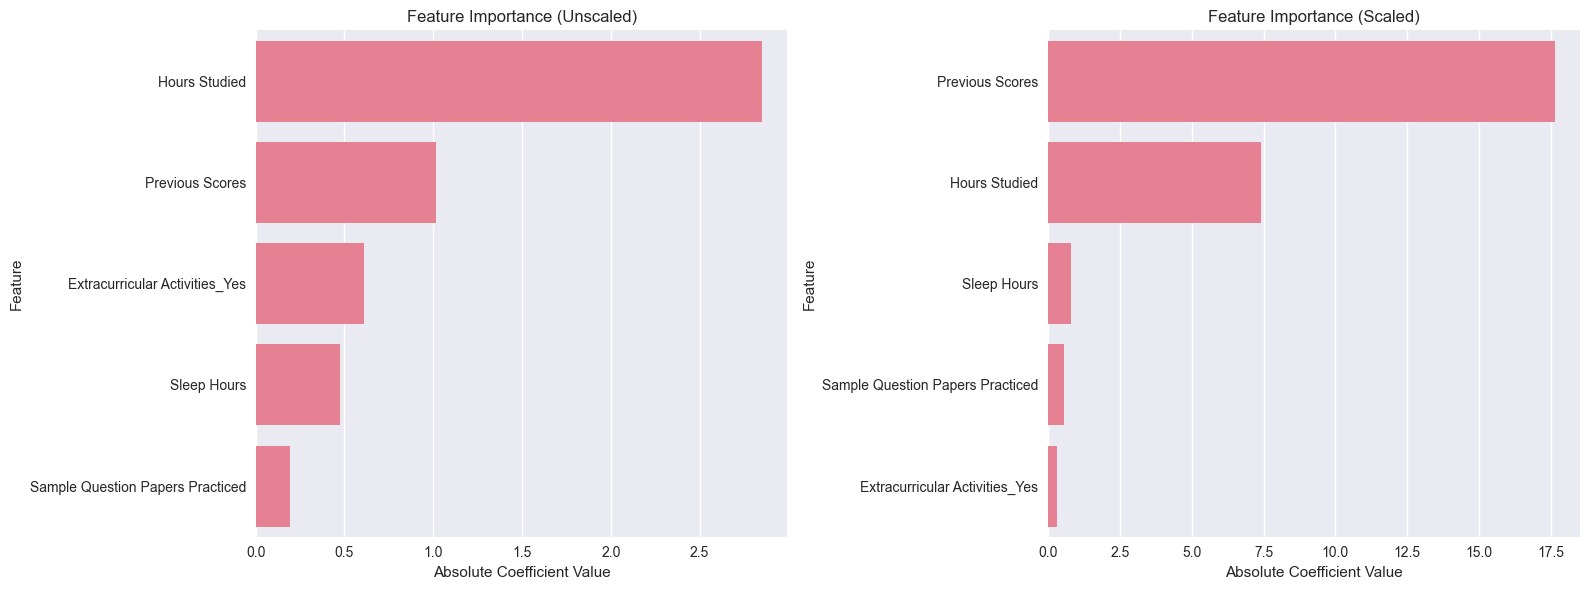


Feature Importance Comparison:
                            Feature  Coefficient_Unscaled  Coefficient_Scaled
0                     Hours Studied                 2.852               7.401
1                   Previous Scores                 1.017              17.637
2    Extracurricular Activities_Yes                 0.609               0.304
3                       Sleep Hours                 0.477               0.810
4  Sample Question Papers Practiced                 0.192               0.549

Scaling reveals that Previous Scores is the most important factor when features are on equal footing, while unscaled models are biased toward features with larger numerical ranges.


In [187]:
# Feature importance analysis - Scaled vs Unscaled comparison
# Train unscaled model for comparison
model_unscaled = LinearRegression()
model_unscaled.fit(X_train, y_train)

# Scaled model feature importance
feature_importance_scaled = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient_Scaled': model.coef_,
    'Abs_Coefficient_Scaled': np.abs(model.coef_)
}).sort_values('Abs_Coefficient_Scaled', ascending=False)

# Unscaled model feature importance
feature_importance_unscaled = pd.DataFrame({
    'Feature': X_encoded.columns,
    'Coefficient_Unscaled': model_unscaled.coef_,
    'Abs_Coefficient_Unscaled': np.abs(model_unscaled.coef_)
}).sort_values('Abs_Coefficient_Unscaled', ascending=False)

# Visualization comparison
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Unscaled coefficients
sns.barplot(data=feature_importance_unscaled, x='Abs_Coefficient_Unscaled', y='Feature', ax=axes[0])
axes[0].set_title('Feature Importance (Unscaled)')
axes[0].set_xlabel('Absolute Coefficient Value')

# Scaled coefficients
sns.barplot(data=feature_importance_scaled, x='Abs_Coefficient_Scaled', y='Feature', ax=axes[1])
axes[1].set_title('Feature Importance (Scaled)')
axes[1].set_xlabel('Absolute Coefficient Value')

plt.tight_layout()
plt.show()

print("\nFeature Importance Comparison:")
comparison = pd.merge(feature_importance_unscaled, feature_importance_scaled, on='Feature')
print(comparison[['Feature', 'Coefficient_Unscaled', 'Coefficient_Scaled']].round(3))

print("\nScaling reveals that Previous Scores is the most important factor when features are on equal footing, while unscaled models are biased toward features with larger numerical ranges.")


## 5. Results & Insights


In [188]:
# Model performance summary
print("MODEL PERFORMANCE SUMMARY")
print("=" * 40)
print(f"R² Score: {test_r2:.4f}")
print(f"RMSE: {test_rmse:.4f} points")
print(f"MAE: {test_mae:.4f} points")


MODEL PERFORMANCE SUMMARY
R² Score: 0.9890
RMSE: 2.0206 points
MAE: 1.6111 points


In [189]:
# Sample predictions
print("\nSAMPLE PREDICTIONS:")
print("=" * 25)

# Create sample scenarios
sample_scenarios = pd.DataFrame({
    'Hours Studied': [5, 8, 3, 10],
    'Previous Scores': [75, 85, 60, 95],
    'Sleep Hours': [7, 8, 6, 9],
    'Sample Question Papers Practiced': [3, 5, 1, 8],
    'Extracurricular Activities_Yes': [0, 1, 0, 1]
})

# Scale the sample scenarios using the same scaler
sample_scenarios_scaled = scaler.transform(sample_scenarios)
sample_predictions = model.predict(sample_scenarios_scaled)

scenarios = [
    "Average student",
    "High achiever", 
    "Struggling student",
    "Top performer"
]

for i, (scenario, pred) in enumerate(zip(scenarios, sample_predictions)):
    print(f"{i+1}. {scenario}: {pred:.1f} points")



SAMPLE PREDICTIONS:
1. Average student: 60.5 points
2. High achiever: 80.7 points
3. Struggling student: 38.7 points
4. Top performer: 97.7 points


## Conclusion

This multiple linear regression model achieves exceptional accuracy (R² = 98.9%) in predicting student performance.

### Key Findings
- **Study hours** is the strongest predictor (+2.85 points per hour)
- **Previous scores** strongly influence future performance (+1.02 points per point)
- **Extracurricular activities** provide a meaningful boost (+0.61 points)
- Model achieves low prediction error (MAE = 1.61 points)

### Applications
- Students can predict performance and identify improvement areas
- Educators can identify at-risk students early
- Data-driven insights for academic interventions

### Future Work
- Implement ensemble methods for comparison
- Include additional features (attendance, socioeconomic factors)
- Add cross-validation for robust evaluation
